## Stable Diffusion (Text to Image) model deployment from SageMaker JumpStart

### SageMaker JumpStart
`Amazon SageMaker JumpStart` is a powerful feature within the Amazon SageMaker machine learning platform that provides developers with a comprehensive hub of state-of-the-art (SOTA) language, vision, and other modalities' deep learning models. With over 600 pre-trained models available and growing every day, SageMaker JumpStart enables developers to quickly and easily incorporate cutting-edge machine learning techniques into their production workflows.

One of the key benefits of SageMaker JumpStart is that it provides developers with access to hundreds of built-in algorithms and pre-trained models from leading model hubs and providers tailored in all the most popular machine learning frameworks like PyTorch, HuggingFace, TensorFlow and more. It also comes with a low-code user interface that makes it easy to get started with deep learning, even for those without extensive machine learning expertise. In addition, JumpStart also provides solution templates for common use cases, as well as executable example notebooks that demonstrate best practices for machine learning with SageMaker.

#### SageMaker JumpStart Foundation Model Hub
`Amazon SageMaker Foundation Model Hub` is a **NEW** feature of SageMaker JumpStart which is a model hub or zoo for SOTA deep learning models that are tailored for a wide range of advanced text and image generation use cases. This hub includes both public and proprietary models, such as those from AWS partners like Stability AI, Cohere, AI21, as well home brewed models like Amazon's own AlexTM and many coming soon.

These LLMs excel in standard benchmarks and are capable of solving a wide range of problems such as text-to-image generation, text summarization, abstractive question answering, sentiment analysis, and entity extraction, among others. They come with a user-friendly playground that allows developers to interactively test different flavors of the models and generate outputs with different generation configurations.

You can access these models via APIs or through SageMaker Studio, and fine-tune or deploy them for your domain-specific use cases with just a few clicks in a no-code fashion, or via APIs if you prefer a high-code execution style. These models come with all the benefits of SageMaker training and hosting and allow you to create endpoints that are automatically enabled for resiliency, scalability, load balancing, and fault tolerance. They tightly integrate with all SageMaker components and AWS services for seamless integration into your existing workflows.

As the number of models continues to grow, SageMaker Foundation Model Hub will remain an essential resource for those seeking to stay at the forefront of the field of generative AI and deep learning.

### Deploy a pre-trained Stable Diffusion model from the SageMaker JumpStart console
In the navigation pane, under **SageMaker JumpStart**, choose **Model, notebooks, solutions**. You’re presented with a range of solutions, foundation models, and other artifacts that can help you get started with a specific model or a specific business problem or use case. If you want to experiment in a particular area, you can use the search function. Or you can simply browse the artifacts to find the relevant model or business solution for your needs. To start exploring the Stable Diffusion models, complete the following steps:

1. Go to the `Foundation Models` section and select the **Stable Diffusion 2.1 base** model and click **View model**.
<div>
    <img src="./img/jumpstart.png" alt="Image jumpstart" width="1000" style="display:inline-block">
</div>
<br>

2. A new tab is opened with the options to train, deploy and view model details as shown below.
<div>
    <img src="./img/stablediffusion2.1base.png" alt="Image sb2.1" width="1000" style="display:inline-block">
</div>
<br>

3. In the Deploy Model section, expand Deployment Configuration. For SageMaker hosting instance, choose the hosting instance (for this lab, we use ml.g5.2xlarge). You can also change the **Endpoint name** as needed. Then click the **Deploy** button.
<div>
    <img src="./img/selectinstancetype_deploy.png" alt="Image instance" width="600" style="display:inline-block">
</div>
<br>

The deploy action will start a new tab showing the model creation status and the model deployment status.
<div>
    <img src="./img/prepare_model.png" alt="Image preparemodel" width="500" style="display:inline-block">
    <img src="./img/create_endpoint.png" alt="Image createendpoint" width="600" style="display:inline-block">
</div>
<br>


4. When the endpoint is deployed, choose **Open Notebook** to open a Jupyter notebook with Python code. Or use the code at the end of this section to invoke the endpoint.

<div>
    <img src="./img/open_notebook.png" alt="Image opennotebook" width="700" style="display:inline-block">
</div>
<br>

5. Click into the first cell and choose **Ctrl+Enter** to run the code block.
<div>
    <img src="./img/notebook.png" alt="Image notebook" width="1000" style="display:inline-block">
</div>
<br>

6. In the **Advanced features** section, it explains what are the advanced parameters this model supports. You can change the `prompt` and the input parameters to the model to generate different image outputs.
<div>
    <img src="./img/prompt.png" alt="Image prompt" width="800" style="display:inline-block">
</div>
<br>


In [ ]:
import json
import boto3
import numpy as np
import matplotlib.pyplot as plt
client = boto3.client('sagemaker-runtime')

In [ ]:
#Invoke the Stable Diffusion 2 model endpoint using below code, you can customise the prompt to test out the different model outputs
endpoint_name = 'jumpstart-dft-stable-diffusion-v2-1-base' # update the endpoint name if needed
prompt = """a cute magical flying cat, fantasy art drawn by disney concept artists, golden colour, high quality, highly detailed, elegant, sharp focus, concept art, character concepts, digital painting, mystery, adventure"""
payload = {'prompt': prompt,
           'num_images_per_prompt': 1, 
           'num_inference_steps': 50, 
           'guidance_scale': 7.5
          }
payload = json.dumps(payload).encode('utf-8')

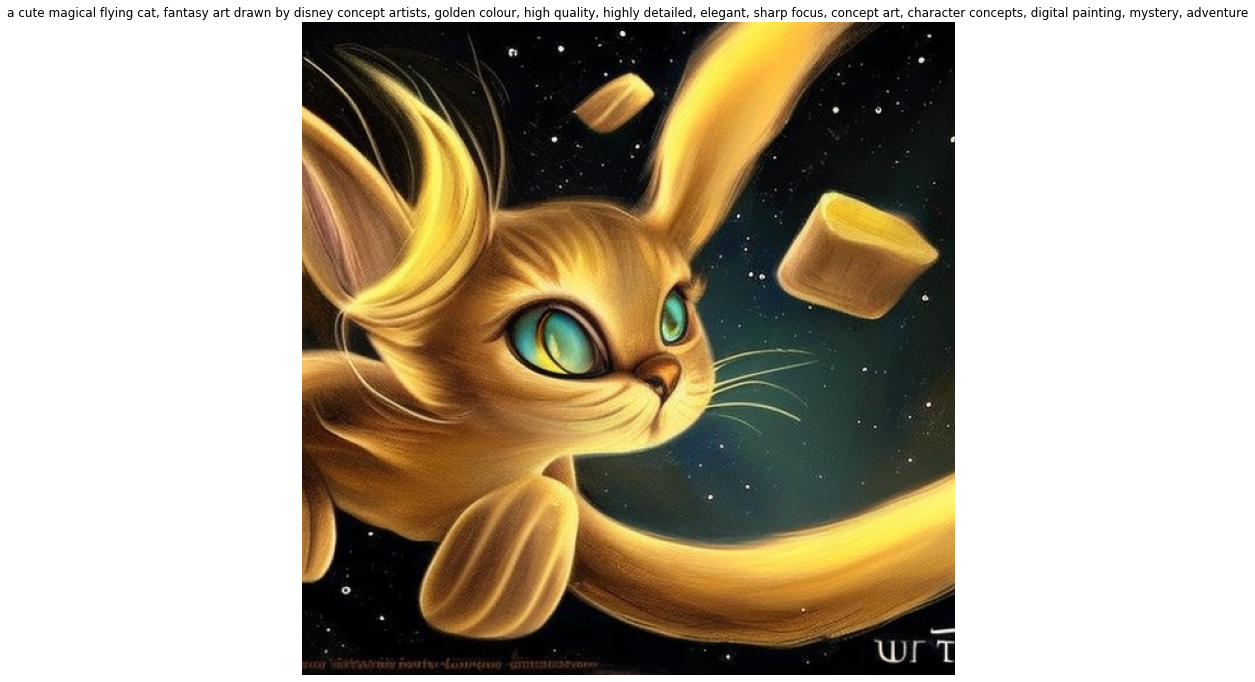

CPU times: user 841 ms, sys: 101 ms, total: 943 ms
Wall time: 9.77 s


In [26]:
%%time

response = client.invoke_endpoint(EndpointName=endpoint_name, 
                                  Body=payload, 
                                  ContentType='application/x-text')
response_body = json.loads(response['Body'].read().decode())
generated_image = response_body['generated_image']
plt.figure(figsize=(12, 12))
plt.imshow(np.array(generated_image))
plt.axis('off')
plt.title(prompt)
plt.show()

### (Optional) Deploy the Stable Diffusion 2 Inpainting model to a SageMaker endpoint
Following similar steps, you can deploy other pre-trained models from JumpStart. Such as the **Stable Diffusion 2 Inpainting** model from [Stability AI](https://stability.ai/blog/stable-diffusion-public-release). It takes an image, a mask image and a text prompt as input. It replaces the mask area of the original image with an image described by the text prompt to generate a new image. Follow the same steps from the above and deploy this model from the JumpStart model hub to a SageMaker endpoint (with instance type `ml.g5.2xlarge`). Once the model is successfully deployed, you can use below code to invoke the endpoint.

In [ ]:
import boto3
import matplotlib.pyplot as plt
import numpy as np
import json
import base64
from PIL import Image
from io import BytesIO
endpoint_name = 'jumpstart-dft-stable-diffusion-2-inpainting'
input_img_file_name = "dog_suit.jpg"
input_img_mask = "dog_suit_mask.jpg"

In [ ]:
def encode_img(img_name):
    with open(img_name,'rb') as f: img_bytes = f.read()
    encoded_img = base64.b64encode(bytearray(img_bytes)).decode()
    return encoded_img

encoded_input_image = encode_img(input_img_file_name)
encoded_mask_image = encode_img(input_img_mask)


payload = { "prompt":"a white cat, blue eyes, wearing a sweater, lying in park", "image": encoded_input_image, "mask_image":encoded_mask_image, "num_inference_steps":50, "guidance_scale":7.5, "seed": 1}

def query_endpoint(payload):
    """query the endpoint with the json payload encoded in utf-8 format."""
    encoded_payload = json.dumps(payload).encode('utf-8')
    client = boto3.client('runtime.sagemaker')
    # Accept = 'application/json;jpeg' returns the jpeg image as bytes encoded by base64.b64 encoding.
    # To receive raw image with rgb value set Accept = 'application/json'
    # To send raw image, you can set content_type = 'application/json' and encoded_image as np.array(PIL.Image.open('low_res_image.jpg')).tolist()
    # Note that sending or receiving payload with raw/rgb values may hit default limits for the input payload and the response size.
    response = client.invoke_endpoint(EndpointName=endpoint_name, ContentType='application/json;jpeg', Accept = 'application/json;jpeg', Body=encoded_payload)
    return response

def display_image(img, title):
    plt.figure(figsize=(12,12))
    plt.imshow(np.array(img))
    plt.axis('off')
    plt.title(title)
    plt.show()

def parse_and_display_response(query_response):
    """Parse the endpoint response and display the generated images"""
    
    response_dict = json.loads(query_response['Body'].read())
    generated_images = response_dict['generated_images']
    
    for generated_image in generated_images:
        with BytesIO(base64.b64decode(generated_image.encode())) as generated_image_decoded:
            with Image.open(generated_image_decoded) as generated_image_np:
                generated_image_rgb = generated_image_np.convert("RGB")
                display_image(generated_image_rgb, "Inpainted Image")

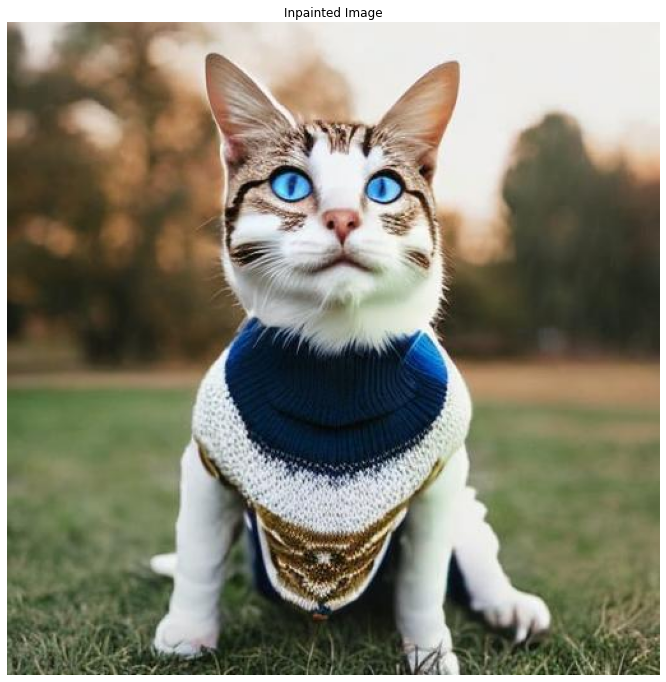

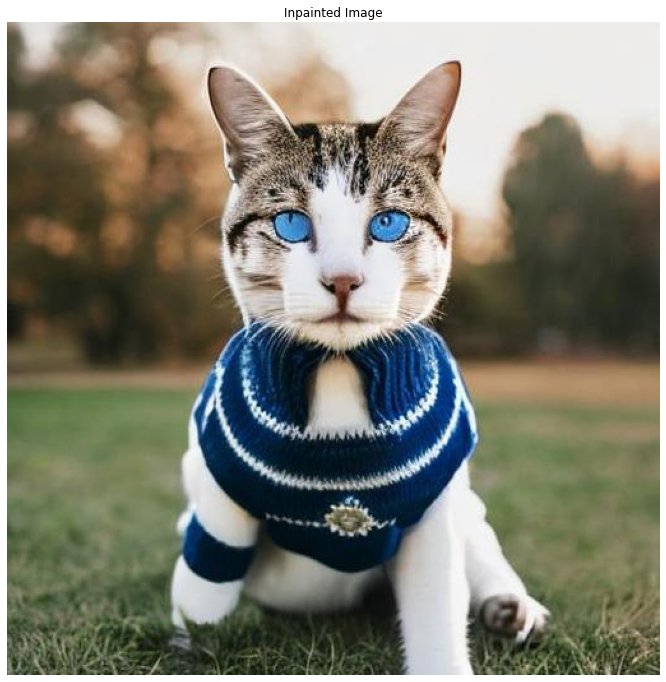

In [30]:
payload = { 
    "prompt":"a white cat, blue eyes, wearing a sweater, lying in park",
    "image":encoded_input_image, 
    "mask_image":encoded_mask_image, 
    "num_inference_steps":30,
    "guidance_scale":7.5,
    "num_images_per_prompt":2,
    "seed": 1,
    "negative_prompt": "poorly drawn feet",
    "batch_size":2
}
query_response = query_endpoint(payload)
parse_and_display_response(query_response)

## Clean up

Before we move on, don’t forget to delete your endpoints when you’re finished. On the previous tab, under **Delete Endpoint**, choose **Delete**. Do the same to other endpoints that you have created during the lab.

<div>
    <img src="./img/delete.png" alt="Image delete" width="800" style="display:inline-block">
</div>
<br>